In [1]:
import numpy  as np
import matplotlib.pyplot as plt
from scipy.constants import G, c

# Observational data

In [2]:
with open ('GW150914 (filtered data).txt') as fx:
    observed_strain = [[float(number) for number in line.split()][0] for line in fx]

fontsize = 20
max_strain = 0
merger_moment = 0
length = np.size(observed_strain)
T = 64
for i in range(length):
    if observed_strain[i] > max_strain:
        max_strain = observed_strain[i]
        merger_moment = i
    
middle = np.size(observed_strain) // 2

shift = merger_moment - middle
if shift > 0:
    observed_strain = observed_strain[shift*2:]
else:
    observed_strain = observed_strain[:shift*2]
    
length = np.size(observed_strain)
time = np.linspace(-T, T, length)

(array([-1.5e-21, -1.0e-21, -5.0e-22,  0.0e+00,  5.0e-22,  1.0e-21,
         1.5e-21]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

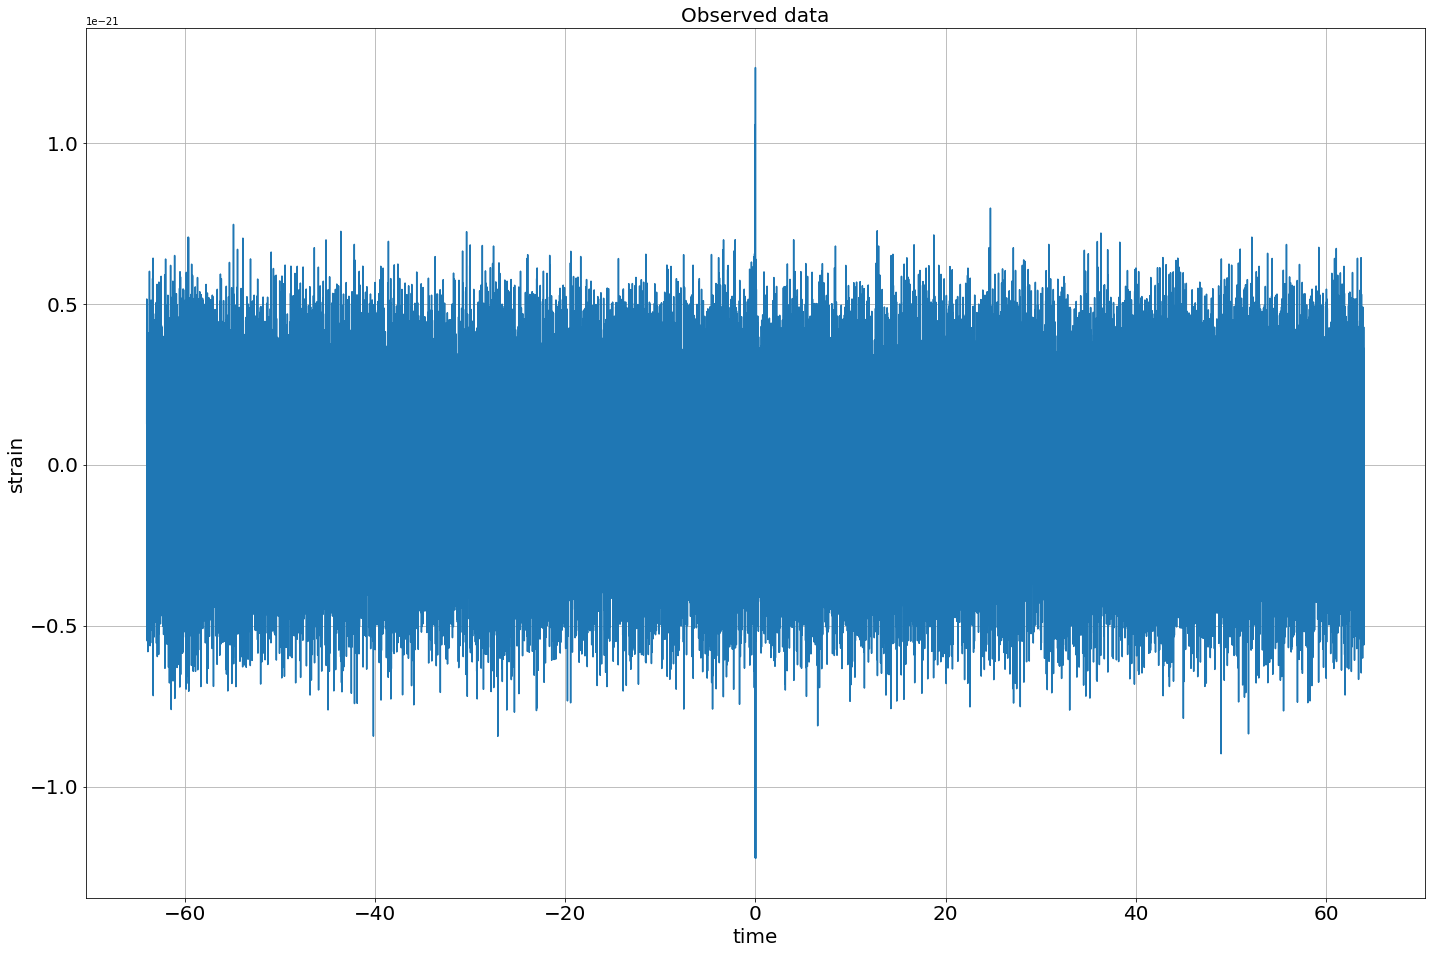

In [3]:
time = np.linspace(-T, T, length)
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time, observed_strain)
frame.set_title('Observed data', fontsize = fontsize)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('strain', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)

# Theoretical approximation

185014

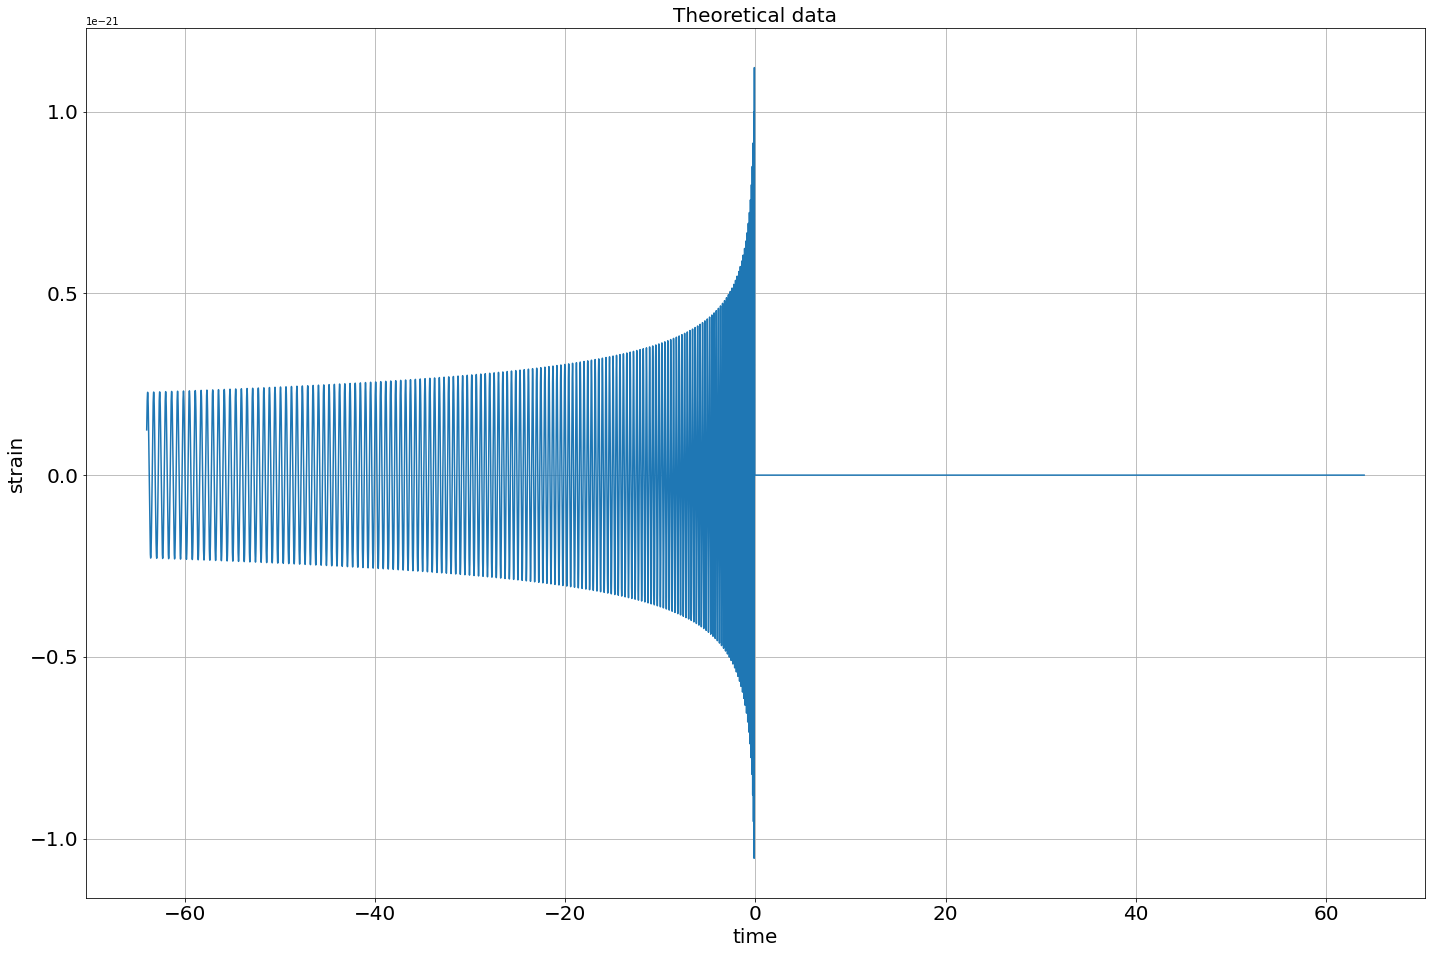

In [6]:
phi_0 = 0
D = 300 * 10**6 * 206265 * 149.6 * 10**9
chirp_mass = 35 * 2 * 10**30
T = 32
end_of_calculations = 0.1
def f (t):
    return ((8 * np.pi)**(8/3) * (G * chirp_mass / c**3)**(5/3) * (-t)) ** (-3/8)

def h_0 (t):
    return 4 * G * chirp_mass *  (G * np.pi * f(t) * chirp_mass / c**3)**(2/3) / (c**2 * D)

def derivative_f (t):
    return (-3/8) * ((8 * np.pi)**(8/3) * (G * chirp_mass / c**3)**(5/3) / 5) ** (-3/8) * (-t)**(-11/8)
    
def h (t):
    if (t > -end_of_calculations):
        return 0
    return h_0(t) * np.cos(2 * np.pi * f(t) * t + np.pi * derivative_f(t) * t**2 + phi_0)

theoretical_strain = np.linspace(-T, T, length)
for i in range (length):
    theoretical_strain[i] = h(time[i])

fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time, theoretical_strain)
frame.set_title('Theoretical data', fontsize = fontsize)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('strain', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
length

# Correlation function

(array([-8.e-43, -6.e-43, -4.e-43, -2.e-43,  0.e+00,  2.e-43,  4.e-43,
         6.e-43]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

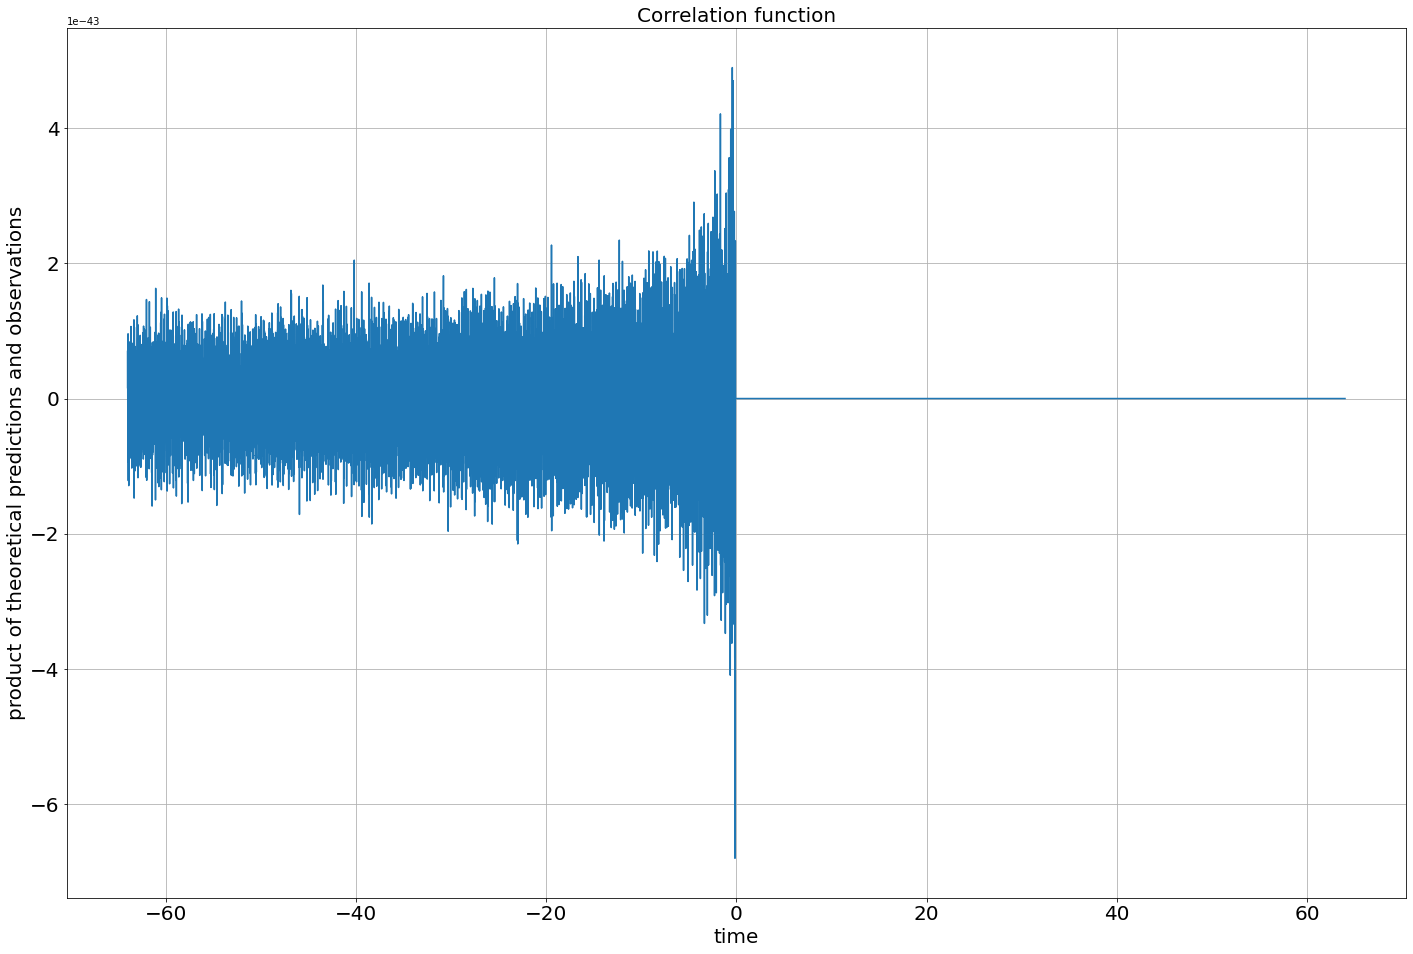

In [5]:
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time, theoretical_strain * observed_strain)
frame.set_title('Correlation function', fontsize = fontsize)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('product of theoretical predictions and observations', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)